## Mounting my drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Neccessary Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from tqdm import tqdm

import random
from sklearn.metrics import confusion_matrix , classification_report

## Data Loading And Pre-Processing

In [ ]:
breast_can = "/content/drive/MyDrive/Dataset_BUSI_with_GT"

In [ ]:
os.listdir(breast_can)

['benign', 'malignant', 'normal']

From the list, there are three classifications of breast samples from the imoaging namely; beningn, malignant, and normal

In [ ]:
# Define transformations for image preprocessing
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to a fixed size
    transforms.CenterCrop(224),     # Center crop to 224x224 (typical for many CNN architectures)
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image data
])

# Load the dataset from subfolders and apply transformations
dataset = ImageFolder(root=breast_can, transform=transform)


print(dataset.targets)

batch_size = 32


train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoader objects for training, validation, and test sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

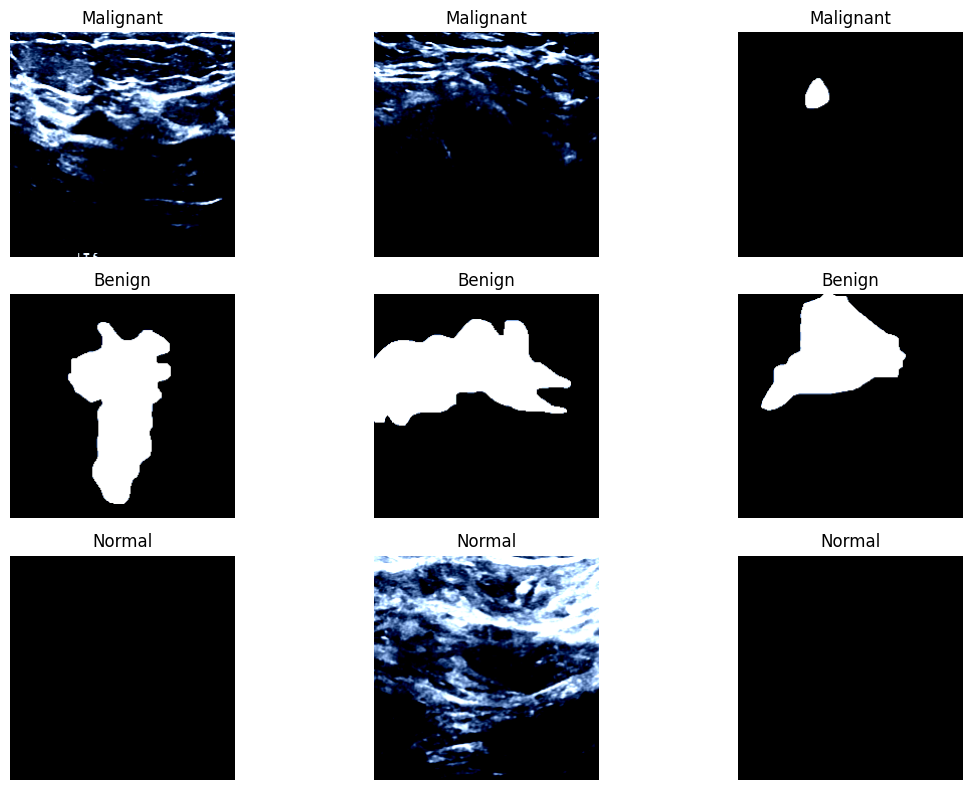

In [ ]:
def plot_images_with_labels(images, labels, class_names, num_images=3):
    fig, axes = plt.subplots(len(class_names), num_images, figsize=(12, 8))

    for i, cls in enumerate(class_names):
        class_indices = np.where(labels == i)[0]
        class_images = images[class_indices][:num_images]

        for j in range(num_images):
            axes[i, j].imshow(class_images[j].permute(1, 2, 0))
            axes[i, j].set_title(class_names[i])
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

images = []
labels = []
class_names = ['Malignant', 'Benign', 'Normal']

for batch in test_loader:
    batch_images, batch_labels = batch
    images.append(batch_images)
    labels.append(batch_labels)

images = torch.cat(images, dim=0)
labels = torch.cat(labels, dim=0)

# Plot three images from each class with labels
plot_images_with_labels(images, labels, class_names)

## Data Splitting And Shape

In [ ]:
train_size = len(train_dataset)
val_size = len(val_dataset)
test_size = len(test_dataset)

print(f"Training set size: {train_size} samples")
print(f"Validation set size: {val_size} samples")
print(f"Test set size: {test_size} samples")

Training set size: 1278 samples
Validation set size: 159 samples
Test set size: 161 samples


## ResNet Model : Pytorch

In [ ]:
# Define the ResNet model architecture
class ResNetExpanded(nn.Module):
    def __init__(self):
        super(ResNetExpanded, self).__init__()
        self.resnet = resnet18(pretrained=True)
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Sequential(
            nn.Linear(num_ftrs, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 3)  # 3 classes: malignant and benign
        )

    def forward(self, x):
        x = self.resnet(x)
        return x

# Initialize the model
model = ResNetExpanded()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Initialize lists to store history
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", unit="batch"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted_train = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    train_accuracy = correct_train / total_train
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss += criterion(outputs, labels).item()

            _, predicted_val = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()

    val_accuracy = correct_val / total_val
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 141MB/s]
Epoch 1/10: 100%|██████████| 40/40 [02:47<00:00,  4.18s/batch]


Epoch 1/10, Train Loss: 0.6239, Val Loss: 1.3956, Train Acc: 0.7042, Val Acc: 0.7170


Epoch 2/10: 100%|██████████| 40/40 [00:17<00:00,  2.24batch/s]


Epoch 2/10, Train Loss: 0.4466, Val Loss: 1.1862, Train Acc: 0.8185, Val Acc: 0.6855


Epoch 3/10: 100%|██████████| 40/40 [00:17<00:00,  2.27batch/s]


Epoch 3/10, Train Loss: 0.4132, Val Loss: 0.6086, Train Acc: 0.8388, Val Acc: 0.7673


Epoch 4/10: 100%|██████████| 40/40 [00:17<00:00,  2.26batch/s]


Epoch 4/10, Train Loss: 0.3614, Val Loss: 0.8117, Train Acc: 0.8631, Val Acc: 0.7547


Epoch 5/10: 100%|██████████| 40/40 [00:17<00:00,  2.24batch/s]


Epoch 5/10, Train Loss: 0.3013, Val Loss: 0.3000, Train Acc: 0.8928, Val Acc: 0.8868


Epoch 6/10: 100%|██████████| 40/40 [00:17<00:00,  2.28batch/s]


Epoch 6/10, Train Loss: 0.2564, Val Loss: 0.2536, Train Acc: 0.8991, Val Acc: 0.8931


Epoch 7/10: 100%|██████████| 40/40 [00:19<00:00,  2.10batch/s]


Epoch 7/10, Train Loss: 0.3094, Val Loss: 0.3839, Train Acc: 0.8991, Val Acc: 0.8113


Epoch 8/10: 100%|██████████| 40/40 [00:17<00:00,  2.27batch/s]


Epoch 8/10, Train Loss: 0.3098, Val Loss: 0.4163, Train Acc: 0.9006, Val Acc: 0.8491


Epoch 9/10: 100%|██████████| 40/40 [00:18<00:00,  2.19batch/s]


Epoch 9/10, Train Loss: 0.2317, Val Loss: 0.9523, Train Acc: 0.9257, Val Acc: 0.7736


Epoch 10/10: 100%|██████████| 40/40 [00:17<00:00,  2.24batch/s]


Epoch 10/10, Train Loss: 0.1790, Val Loss: 1.0629, Train Acc: 0.9366, Val Acc: 0.8491


## Model Evaluation : ResNet

### Epoch History : Accuracy And Loss

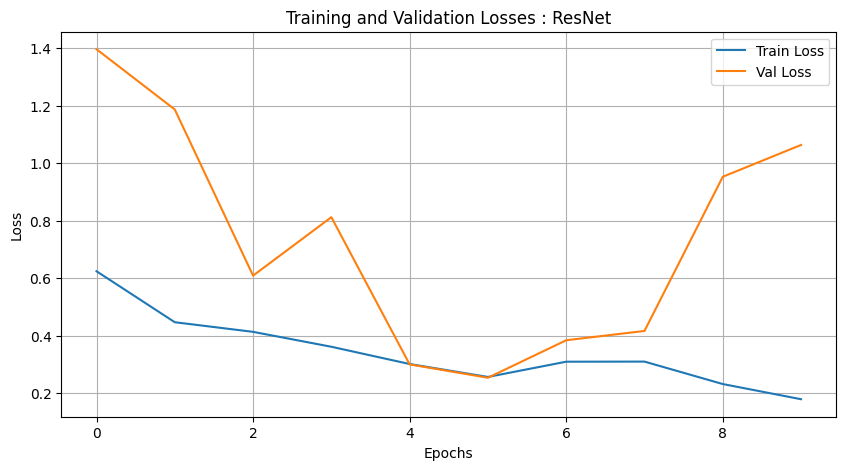

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Losses : ResNet')
plt.grid()
plt.show()


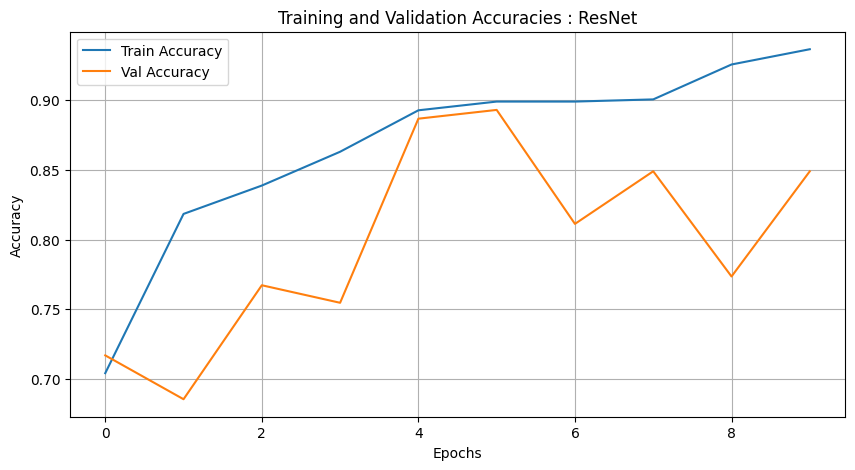

In [ ]:
# Plotting training and validation accuracies
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracies : ResNet')
plt.grid()
plt.show()

### Model Evaluation On Test Set : Classification Report

In [ ]:
# Testing
model.eval()
test_correct = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        test_correct += (predicted == labels).sum().item()

test_accuracy = test_correct / test_size
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7950


In [ ]:
model.eval()
total_predicted = []
total_true = []

label_mapping = {0 : 'malignant' , 1 : 'benign' , 2 : 'normal'}

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Convert predicted and true labels to numpy arrays
        predicted = predicted.cpu().numpy()
        true = labels.cpu().numpy()

        # Collect predicted and true labels for each batch
        total_predicted.extend(predicted)
        total_true.extend(true)

# Calculate classification report for all batches combined
classification_rep = classification_report(total_true, total_predicted, target_names=label_mapping.values())
print("Classification Report for Testing Data:")
print(classification_rep)


Classification Report for Testing Data:
              precision    recall  f1-score   support

   malignant       0.71      0.99      0.83        81
      benign       1.00      0.62      0.76        47
      normal       0.95      0.58      0.72        33

    accuracy                           0.80       161
   macro avg       0.89      0.73      0.77       161
weighted avg       0.85      0.80      0.79       161



### Confusion Matrix

In [ ]:
true_labels = []
predicted_labels = []

model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

conf_matrix = confusion_matrix(total_true, total_predicted)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[80  0  1]
 [18 29  0]
 [14  0 19]]


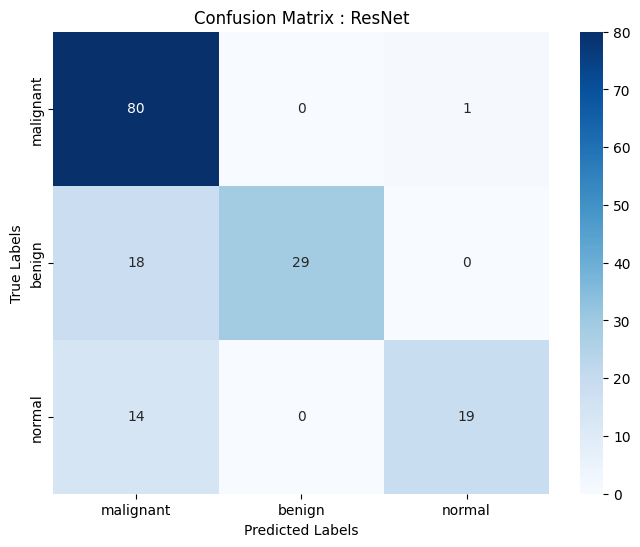

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(total_true, total_predicted)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix : ResNet")
plt.show()

### Plotting Predicted Images

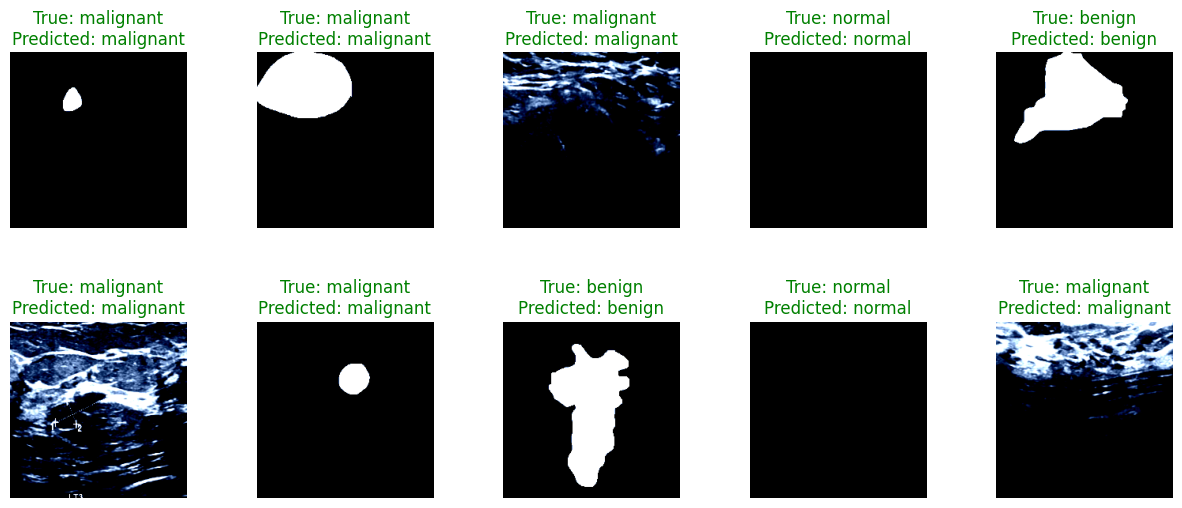

In [ ]:
def plot_images(test_loader, model, label_mapping, device):
    model.eval()
    sample_images = []
    sample_true_labels = []
    sample_predicted_labels = []

    with torch.no_grad():
        total_batches = len(test_loader)

        batch_index = random.randint(0, total_batches - 1)

        images, labels = next(iter(test_loader))
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        images_np = images.cpu().numpy()
        labels_np = labels.cpu().numpy()
        predicted_np = predicted.cpu().numpy()

        # Randomly select 10 images from the batch
        indices = random.sample(range(len(images)), 10)
        sample_images = images_np[indices]
        sample_true_labels = labels_np[indices]
        sample_predicted_labels = predicted_np[indices]

    fig, axs = plt.subplots(2, 5, figsize=(15, 6))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, ax in enumerate(axs.flat):
        ax.imshow(np.transpose(sample_images[i], (1, 2, 0)))
        ax.axis("off")
        true_label = label_mapping[sample_true_labels[i]]
        predicted_label = label_mapping[sample_predicted_labels[i]]
        color = 'green' if sample_true_labels[i] == sample_predicted_labels[i] else 'red'
        ax.set_title(f'True: {true_label}\nPredicted: {predicted_label}', color=color)

    plt.show()

plot_images(test_loader, model, label_mapping, device)

## Custom CNN : Pytorch

In [ ]:
# Define the custom CNN model architecture
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 56 * 56, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 3)  # Output for 3 classes: malignant, benign, normal

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = x.view(-1, 64 * 56 * 56)  # Flatten the output for fully connected layers
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the custom CNN model
custom_model = CustomCNN()

# Define loss function and optimizer for the custom CNN model
custom_criterion = nn.CrossEntropyLoss()
custom_optimizer = optim.Adam(custom_model.parameters(), lr=0.001)

# Training loop for the custom CNN model
custom_epochs = 10
custom_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
custom_model.to(custom_device)

custom_train_losses = []
custom_train_accuracies = []
custom_val_losses = []
custom_val_accuracies = []

for epoch in range(custom_epochs):
    custom_model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in tqdm(train_loader, desc=f"Custom CNN Epoch {epoch+1}/{custom_epochs}", unit="batch"):
        images, labels = images.to(custom_device), labels.to(custom_device)

        custom_optimizer.zero_grad()
        outputs = custom_model(images)
        loss = custom_criterion(outputs, labels)
        loss.backward()
        custom_optimizer.step()

        running_loss += loss.item()

        _, predicted_train = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    train_accuracy = correct_train / total_train
    custom_train_losses.append(running_loss / len(train_loader))
    custom_train_accuracies.append(train_accuracy)

    # Validation loop for the custom CNN model
    custom_model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(custom_device), labels.to(custom_device)
            outputs = custom_model(images)
            val_loss += custom_criterion(outputs, labels).item()

            _, predicted_val = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()

    val_accuracy = correct_val / total_val
    custom_val_losses.append(val_loss / len(val_loader))
    custom_val_accuracies.append(val_accuracy)

    print(f"Custom CNN Epoch {epoch+1}/{custom_epochs}, Train Loss: {custom_train_losses[-1]:.4f}, Val Loss: {custom_val_losses[-1]:.4f}, Train Acc: {custom_train_accuracies[-1]:.4f}, Val Acc: {custom_val_accuracies[-1]:.4f}")

Custom CNN Epoch 1/10: 100%|██████████| 40/40 [00:17<00:00,  2.31batch/s]


Custom CNN Epoch 1/10, Train Loss: 1.8364, Val Loss: 0.9543, Train Acc: 0.5540, Val Acc: 0.5660


Custom CNN Epoch 2/10: 100%|██████████| 40/40 [00:17<00:00,  2.28batch/s]


Custom CNN Epoch 2/10, Train Loss: 0.9530, Val Loss: 0.8766, Train Acc: 0.5767, Val Acc: 0.5660


Custom CNN Epoch 3/10: 100%|██████████| 40/40 [00:17<00:00,  2.32batch/s]


Custom CNN Epoch 3/10, Train Loss: 0.7772, Val Loss: 0.7678, Train Acc: 0.6135, Val Acc: 0.6352


Custom CNN Epoch 4/10: 100%|██████████| 40/40 [00:17<00:00,  2.22batch/s]


Custom CNN Epoch 4/10, Train Loss: 0.5780, Val Loss: 0.7864, Train Acc: 0.7074, Val Acc: 0.6352


Custom CNN Epoch 5/10: 100%|██████████| 40/40 [00:18<00:00,  2.19batch/s]


Custom CNN Epoch 5/10, Train Loss: 0.3155, Val Loss: 1.0258, Train Acc: 0.9006, Val Acc: 0.7233


Custom CNN Epoch 6/10: 100%|██████████| 40/40 [00:17<00:00,  2.24batch/s]


Custom CNN Epoch 6/10, Train Loss: 0.1426, Val Loss: 1.0270, Train Acc: 0.9617, Val Acc: 0.6981


Custom CNN Epoch 7/10:  70%|███████   | 28/40 [00:12<00:06,  1.92batch/s]

## Model Evaluation : Custom CNN

### Epoch History (Accuracy And Loss) : Custom CNN

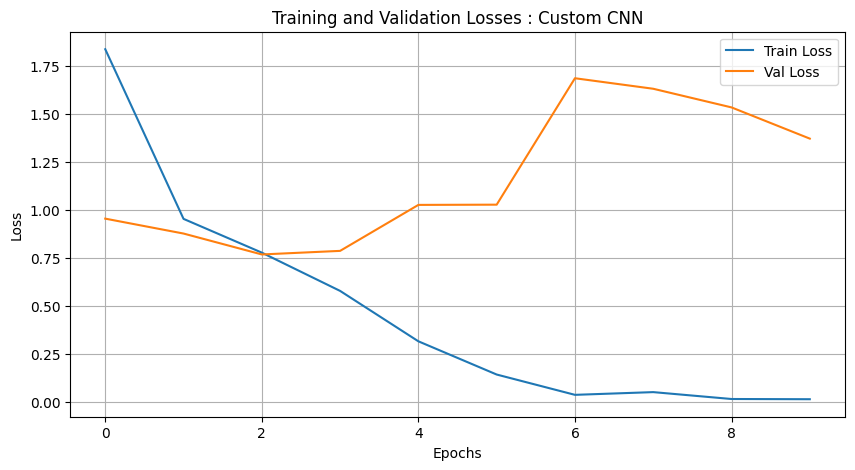

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(custom_train_losses, label='Train Loss')
plt.plot(custom_val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Losses : Custom CNN')
plt.grid()
plt.show()

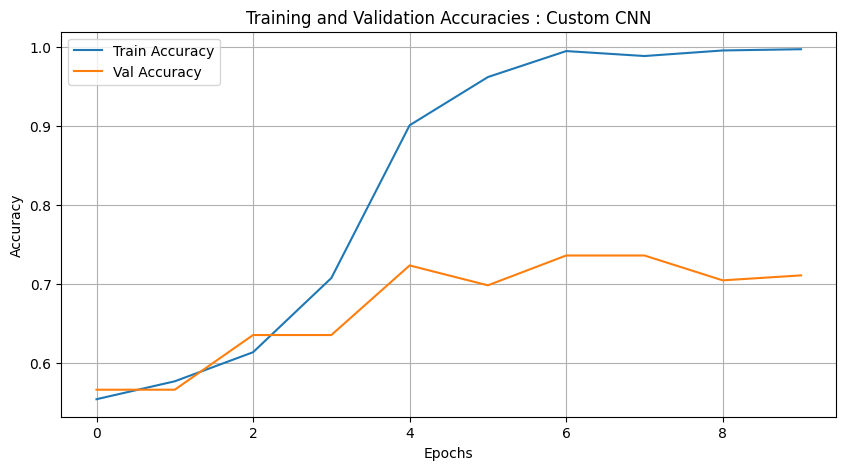

In [ ]:
# Plotting training and validation accuracies
plt.figure(figsize=(10, 5))
plt.plot(custom_train_accuracies, label='Train Accuracy')
plt.plot(custom_val_accuracies, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracies : Custom CNN')
plt.grid()
plt.show()

### Model Evaluation On Test Set (Classification Report) : Custom CNN

In [ ]:
# Testing
custom_model.eval()
custom_test_correct = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = custom_model(images)
        _, predicted = torch.max(outputs, 1)
        custom_test_correct += (predicted == labels).sum().item()

custom_test_accuracy = custom_test_correct / test_size
print(f"Test Accuracy: {custom_test_accuracy:.4f}")

Test Accuracy: 0.6894


In [ ]:
custom_model.eval()
custom_total_predicted = []
custom_total_true = []

label_mapping = {0 : 'malignant' , 1 : 'benign' , 2 : 'normal'}

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = custom_model(images)
        _, predicted = torch.max(outputs, 1)

        # Convert predicted and true labels to numpy arrays
        predicted = predicted.cpu().numpy()
        true = labels.cpu().numpy()

        # Collect predicted and true labels for each batch
        custom_total_predicted.extend(predicted)
        custom_total_true.extend(true)

# Calculate classification report for all batches combined
classification_rep = classification_report(custom_total_true, custom_total_predicted, target_names=label_mapping.values())
print("Classification Report for Testing Data: Custom CNN")
print(classification_rep)

Classification Report for Testing Data: Custom CNN
              precision    recall  f1-score   support

   malignant       0.74      0.67      0.70        81
      benign       0.54      0.64      0.58        47
      normal       0.84      0.82      0.83        33

    accuracy                           0.69       161
   macro avg       0.71      0.71      0.70       161
weighted avg       0.70      0.69      0.69       161



### Confusion Matrix : Custom CNN

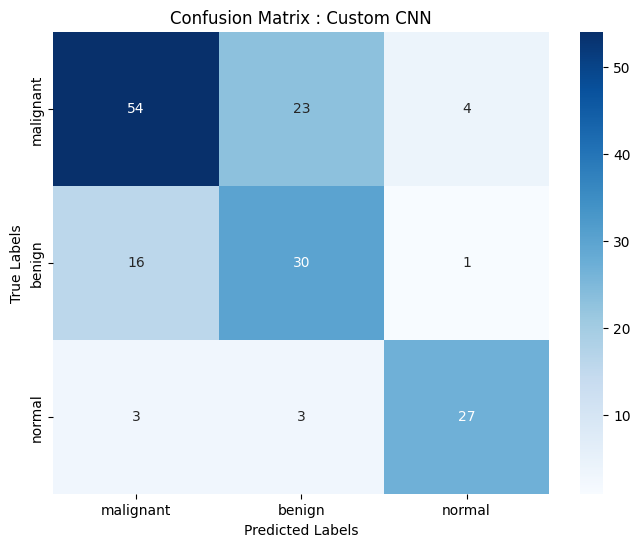

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(custom_total_true, custom_total_predicted)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix : Custom CNN")
plt.show()

### Plotting Predicted Images : CNN

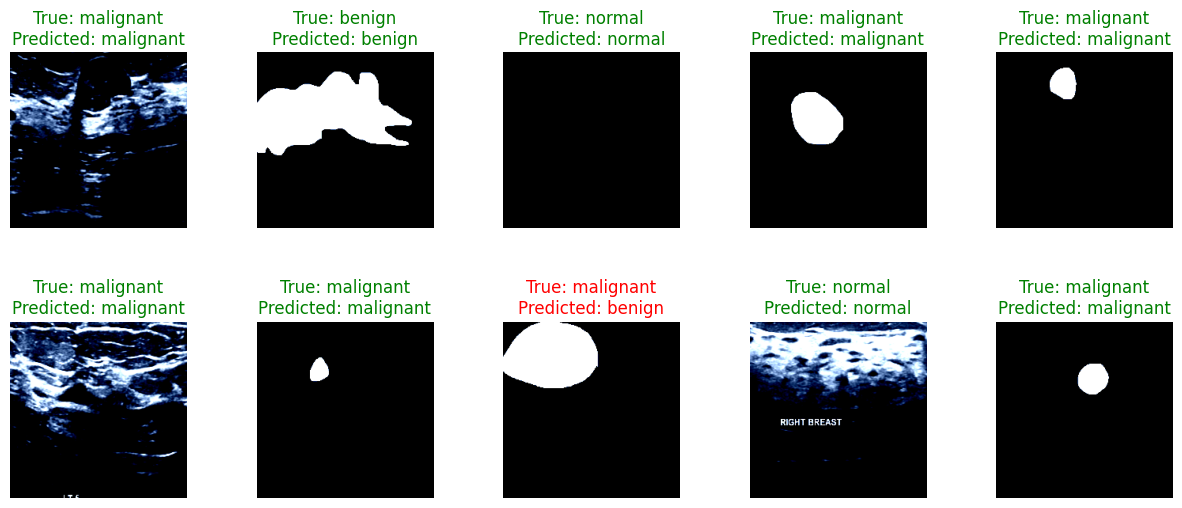

In [ ]:
plot_images(test_loader, custom_model, label_mapping, device)